In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Desktop/ML/datasets_851_1557_reported.csv')
df

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,NaN,NaN,NaN,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,NaN,NaN,NaN,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,NaN,NaN,NaN,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,NaN,NaN,NaN,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,NaN,NaN,NaN,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000


In [2]:
purchased = ['Y','Y','Y','Y','Y','Y','Y','Y','N','N','N','Y','N','Y',
            'Y','Y','N','Y','Y','N','Y','Y','N','Y','N','N','N','N','N',
            'Y','N','N','N','N','N','N','N','N','N','N','N','N','Y','N','N',
            'Y','N','N','Y','Y','Y','N','N','Y','Y','Y','N','N','Y','Y','N',
            'N','Y','Y','Y','Y']
df['purchased'] = purchased

In [3]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

house.theft             15
vehicle.theft            7
out.of.vehicle.theft    15
shop.theft              15
narcotics                4
dtype: int64


In [4]:
df = df.dropna(axis = 0)
df.head()

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population,purchased
15,1965,5801,5090,167,3,151,51,8,3694,1042,...,717.0,123.0,12,431,297,711,10.0,213,7734000,Y
16,1966,6063,5263,184,3,166,48,8,3736,1031,...,641.0,168.0,14,529,287,800,13.0,218,7808000,N
17,1967,6421,5555,189,2,173,49,8,3939,1086,...,639.0,204.0,13,548,314,867,51.0,229,7868000,Y
18,1968,7166,6242,228,1,212,47,8,4240,1232,...,628.0,291.0,15,801,364,924,101.0,201,7914000,Y
19,1969,7671,6036,241,1,223,42,8,4142,1131,...,574.0,255.0,16,681,376,1635,552.0,231,7968000,N


In [5]:
#filtering the df to get those columns which affect the purchasing 
dfd = df.filter(['stealing.general','shop.theft','burglary','robbery','fraud',
                'vehicle.theft','house.theft','purchased'],axis=1)
dfd.head()


,stealing.general,shop.theft,burglary,robbery,fraud,vehicle.theft,house.theft,purchased
15,3694,123.0,1042,12,431,397.0,99.0,Y
16,3736,168.0,1031,14,529,350.0,105.0,N
17,3939,204.0,1086,13,548,384.0,108.0,Y
18,4240,291.0,1232,15,801,396.0,114.0,Y
19,4142,255.0,1131,16,681,384.0,116.0,N


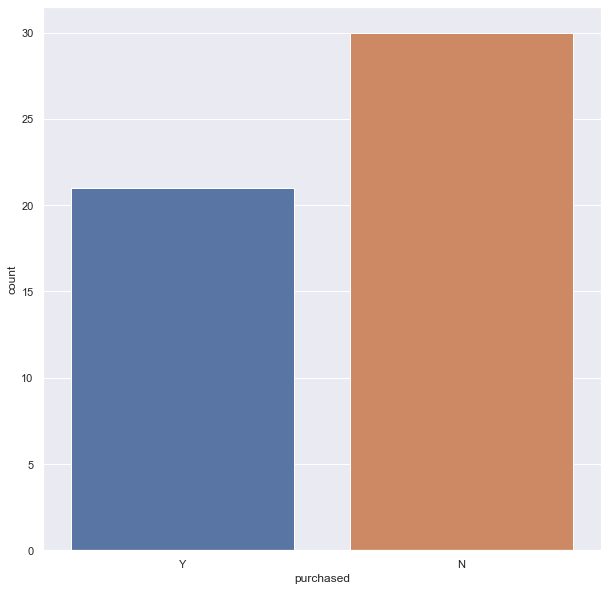

In [90]:
import seaborn as sns
sns.set()
sns.countplot(df['purchased'],label='Year')

### Visualising how the  thefts affected the purchasing

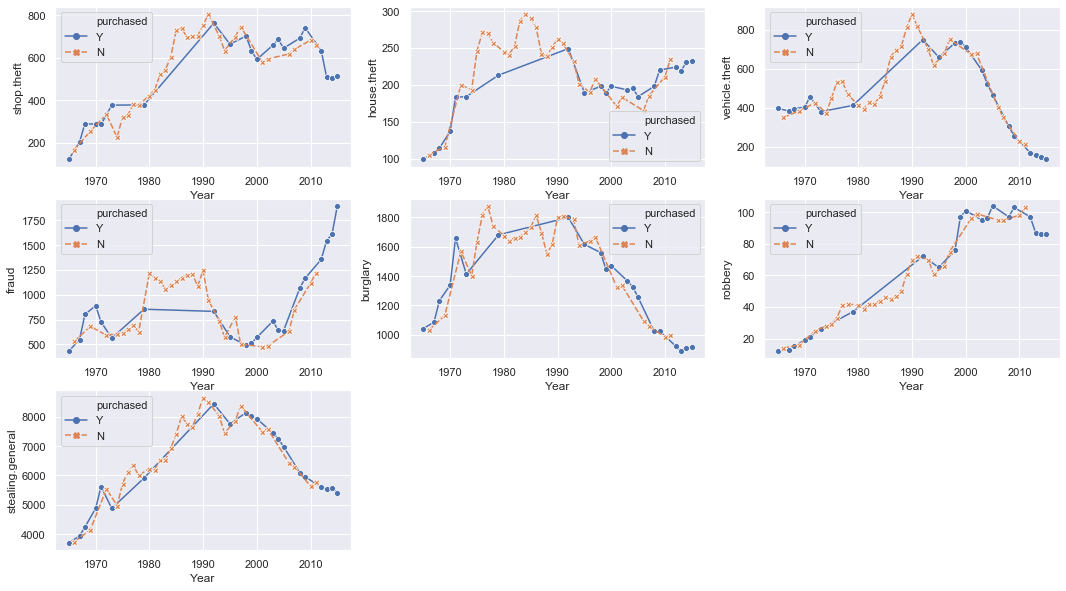

In [62]:
plt.figure(figsize=(18,10))
plt.subplot(3,3,1)
ax = sns.lineplot(x='Year', y='shop.theft', hue = 'purchased', style = 'purchased', data = df, ci=None,markers=True)
plt.subplot(3,3,2)
ax = sns.lineplot(x='Year', y='house.theft', hue = 'purchased', style = 'purchased', data = df, ci=None,markers=True)
plt.subplot(3,3,3)
ax = sns.lineplot(x='Year', y='vehicle.theft', hue = 'purchased', style = 'purchased', data = df, ci=None,markers=True)
plt.subplot(3,3,4)
ax = sns.lineplot(x='Year', y='fraud', hue = 'purchased', style = 'purchased', data = df, ci=None,markers=True)
plt.subplot(3,3,5)
ax = sns.lineplot(x='Year', y='burglary', hue = 'purchased', style = 'purchased', data = df, ci=None,markers=True)
plt.subplot(3,3,6)
ax = sns.lineplot(x='Year', y='robbery', hue = 'purchased', style = 'purchased', data = df, ci=None,markers=True)
plt.subplot(3,3,7)
ax = sns.lineplot(x='Year', y='stealing.general', hue = 'purchased', style = 'purchased', data = df, ci=None,markers=True)

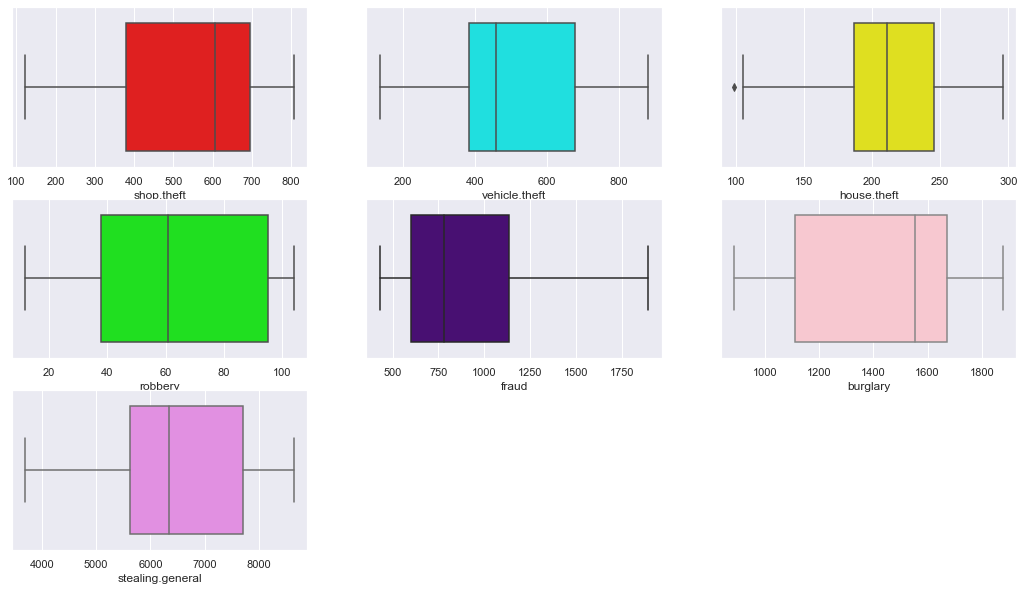

In [64]:
#box plot of all the crimes
plt.figure(figsize=(18,10))
plt.subplot(3,3,1)
sns.boxplot(dfd['shop.theft'],color="red")
plt.subplot(3,3,2)
sns.boxplot(dfd['vehicle.theft'],color='cyan')
plt.subplot(3,3,3)
sns.boxplot(dfd['house.theft'],color='yellow')
plt.subplot(3,3,4)
sns.boxplot(dfd['robbery'],color='lime')
plt.subplot(3,3,5)
sns.boxplot(dfd['fraud'],color='indigo')
plt.subplot(3,3,6)
sns.boxplot(dfd['burglary'],color='pink')
plt.subplot(3,3,7)
sns.boxplot(dfd['stealing.general'],color='violet')
plt.show()

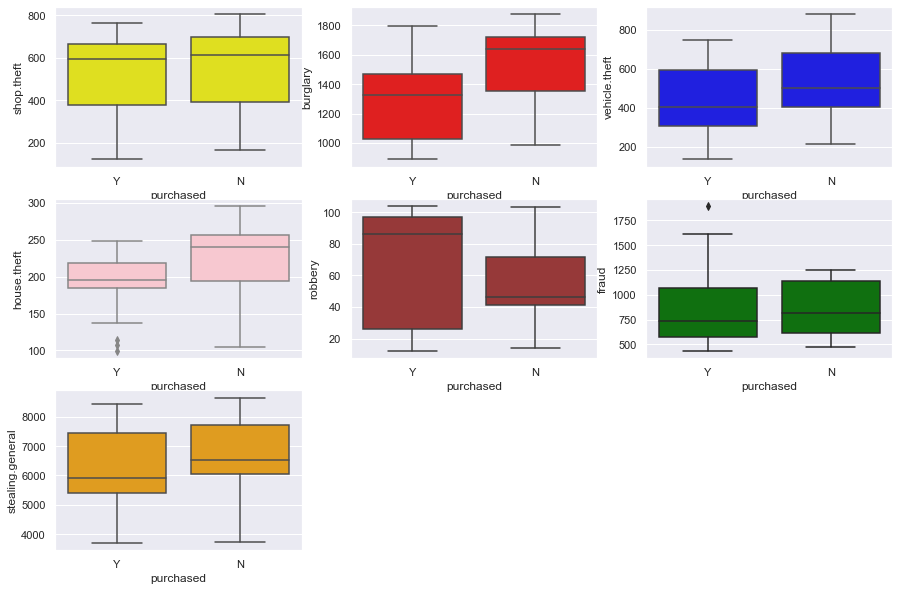

In [73]:
plt.figure(figsize=(15,10))
sns.set_palette("pastel")

plt.subplot(3,3,1)
ax = sns.boxplot(x="purchased", y="shop.theft", data=dfd, color = 'yellow')
plt.subplot(3,3,2)
ax = sns.boxplot(x="purchased", y="burglary", data=dfd, color="red")
plt.subplot(3,3,3)
ax = sns.boxplot(x="purchased", y="vehicle.theft", data=dfd, color="blue")
plt.subplot(3,3,4)
ax = sns.boxplot(x="purchased", y="house.theft", data=dfd, color="pink")
plt.subplot(3,3,5)
ax = sns.boxplot(x="purchased", y="robbery", data=dfd, color="brown")
plt.subplot(3,3,6)
ax = sns.boxplot(x="purchased", y="fraud", data=dfd, color="green")
plt.subplot(3,3,7)
ax = sns.boxplot(x="purchased", y="stealing.general", data=dfd, color="orange")
plt.show()

<Figure size 576x576 with 0 Axes>

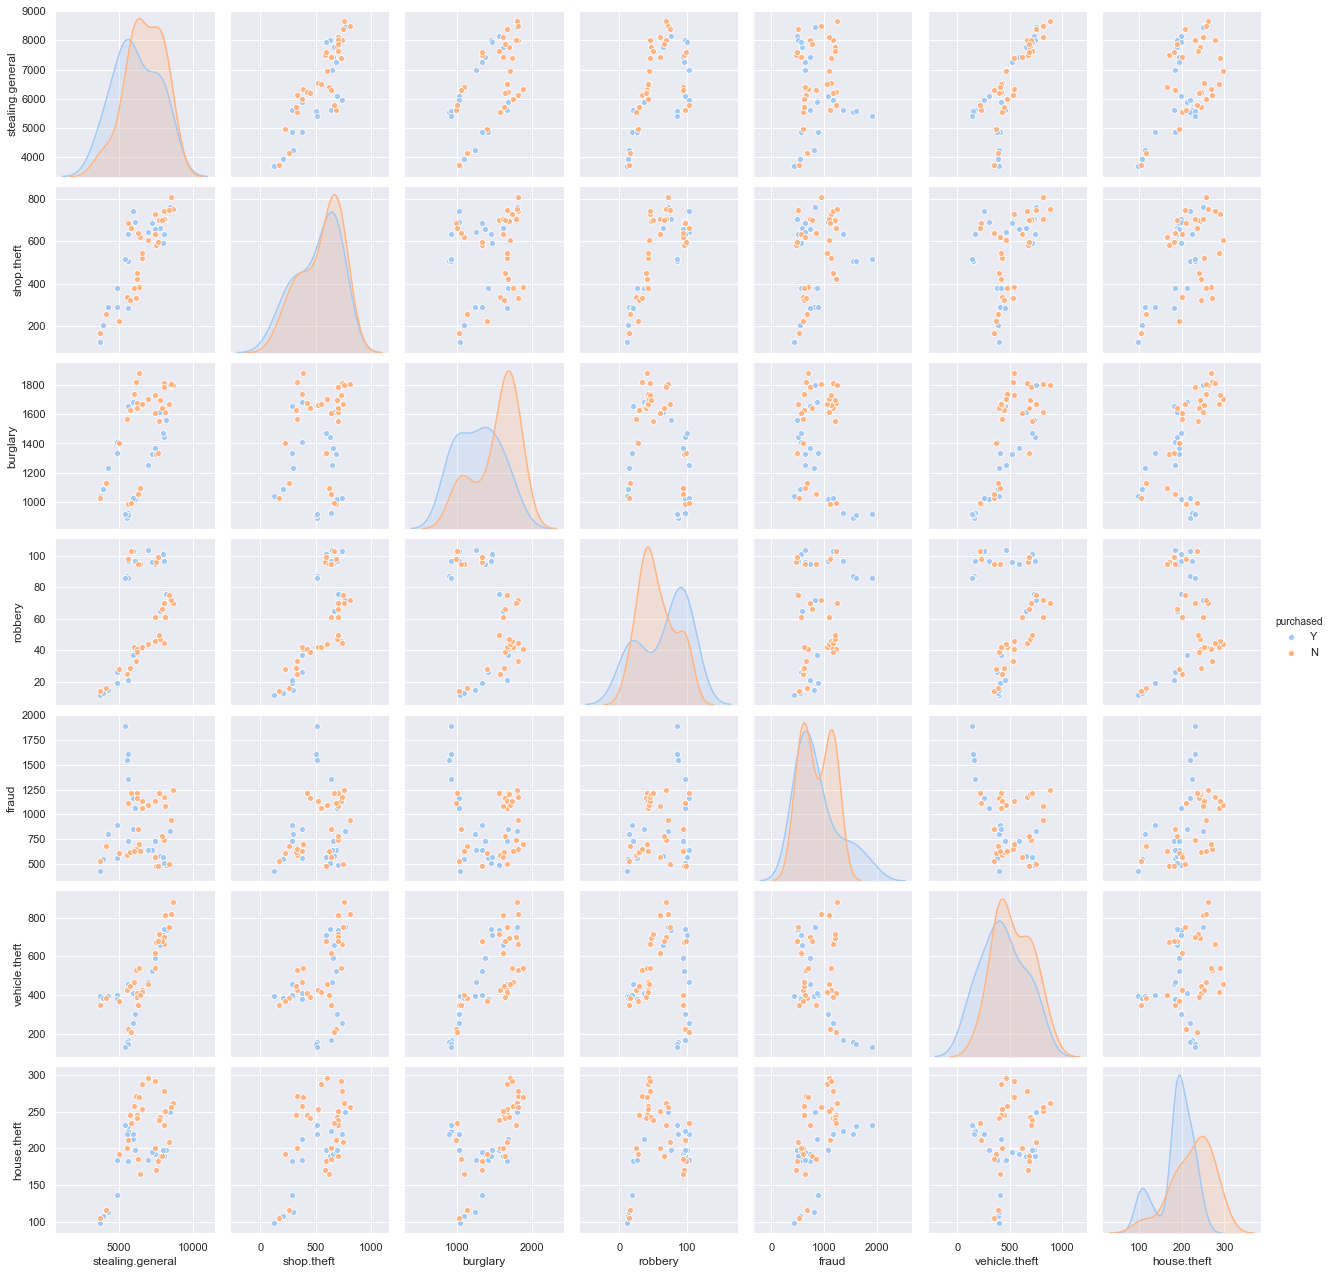

In [82]:
plt.figure(figsize=(8,8))
sns.pairplot(dfd,hue='purchased')
plt.show()

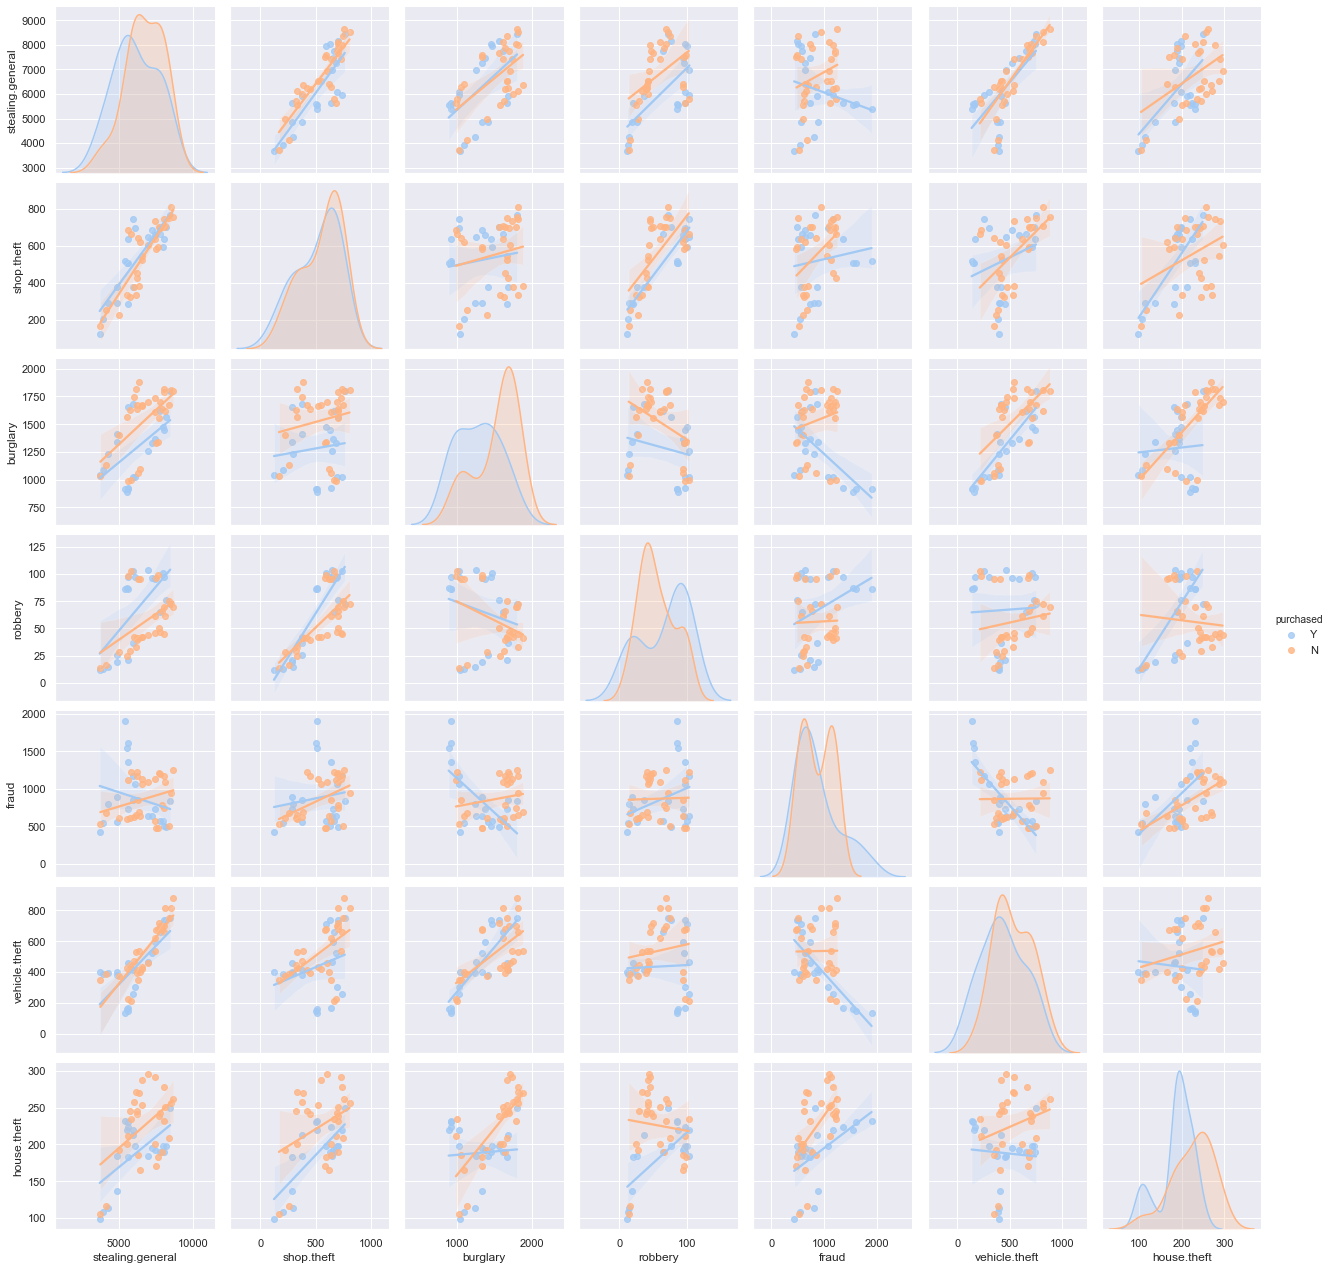

In [83]:
sns.pairplot(dfd,hue='purchased',kind='reg')

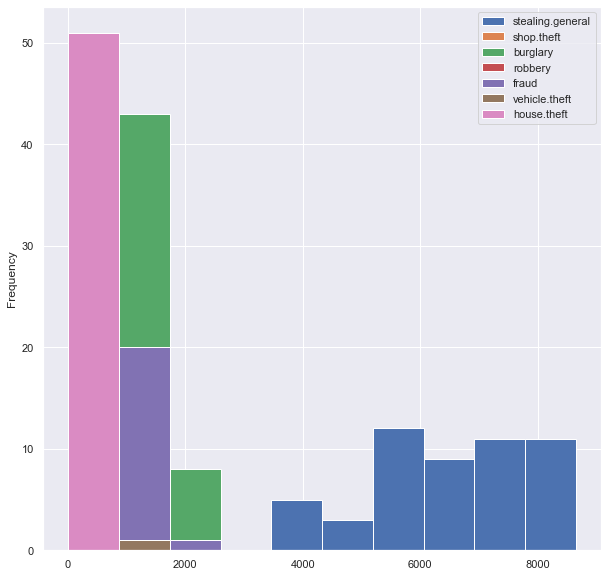

In [91]:
import seaborn as sns
dfd.plot(kind='hist')

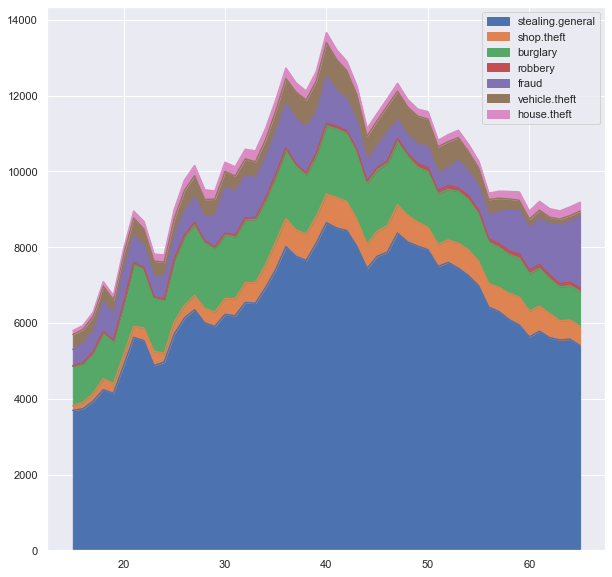

In [93]:
#area plot
dfd.plot(kind='area')